In [ ]:
! pip install spacy seaborn
! python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 9.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import string
from collections import Counter, defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import json
import csv

# Loading customization for plots
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# define the constant variable
__location__ = '/content/drive/MyDrive/nlpKaggle/nlpTrainningData/project-data/'
location_covid_data = 'covid_tweets/covid_tweets.json'
location_covid_prediction = 'covidData.csv'
location_user_timeline = 'user_timeline_tweets/user_timeline_tweets.json'

# read data
covidData = json.load(open(__location__ + location_covid_data))

csvPredectionFile =  open(__location__ + location_covid_prediction, 'r')
csvPredectionReader = csv.reader(csvPredectionFile, skipinitialspace=True)
covidLabelOri = [ {'label': row[1]} for row in csvPredectionReader if row != []][1:]

# get df format data
dfCovidLabel = pd.DataFrame(covidLabelOri)
dfCovidData = pd.DataFrame(covidData)

# extract the rumour and non rumour list
rumorList = []
nonRumorList = []
for i, tweetChain in enumerate(covidData):
  if tweetChain:
    if int(covidLabelOri[i]['label']) == 1:
      rumorList.append(tweetChain)
    else:
      nonRumorList.append(tweetChain)

In [ ]:
def plot_characteristics_in_histogram(non_rumour_count, rumour_count, title):
    
    """A function for plotting numerical counts as a Histogram"""

    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(non_rumour_count, ax=axes[0], color='#e74c3c')
    sns.distplot(rumour_count, ax=axes[1], color='#e74c3c')
    
    axes[0].set_xlabel(title)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Non-Rumour Tweets')
    axes[1].set_xlabel(title)
    axes[1].set_title('Rumour Tweets')
    
    fig.suptitle(title, fontsize=24, va='baseline')
    
    fig.tight_layout()

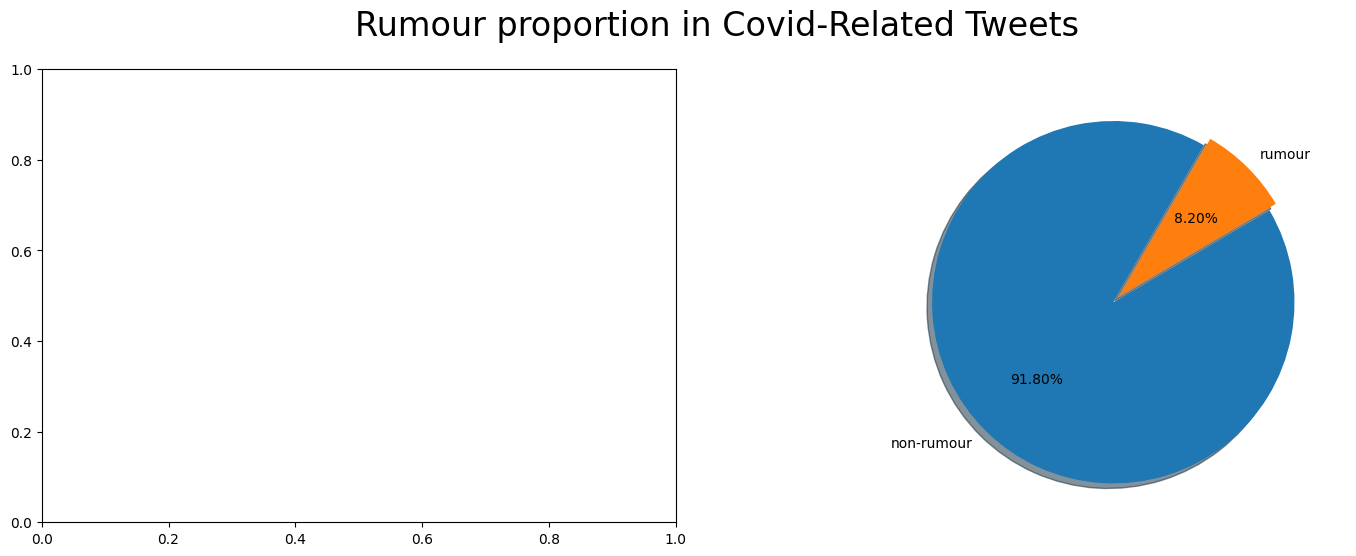

In [ ]:
# display the distribution of label
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), dpi=100)
axes[1].pie(dfCovidLabel['label'].value_counts(),
            labels=['non-rumour', 'rumour'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
fig.suptitle('Rumour proportion in Covid-Related Tweets', fontsize=24)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

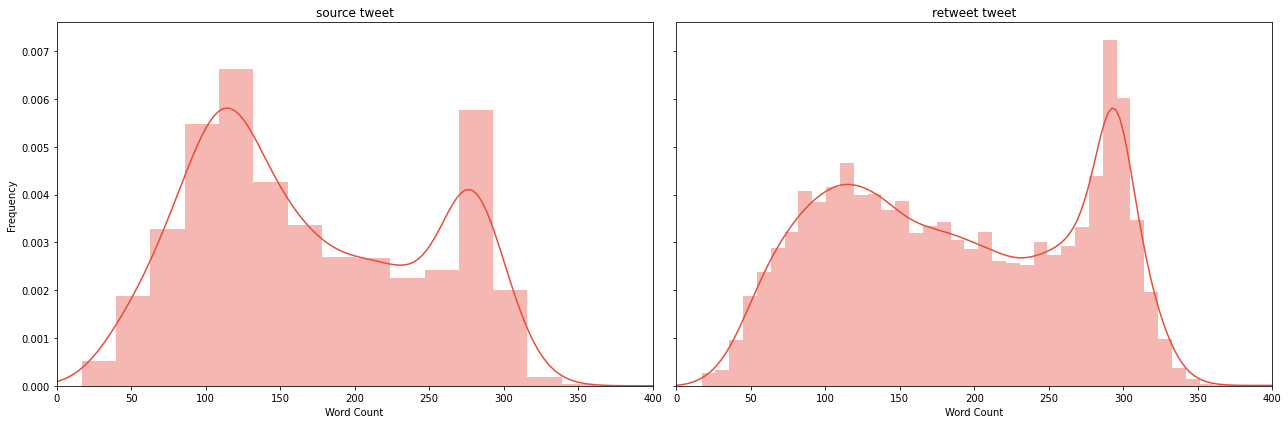

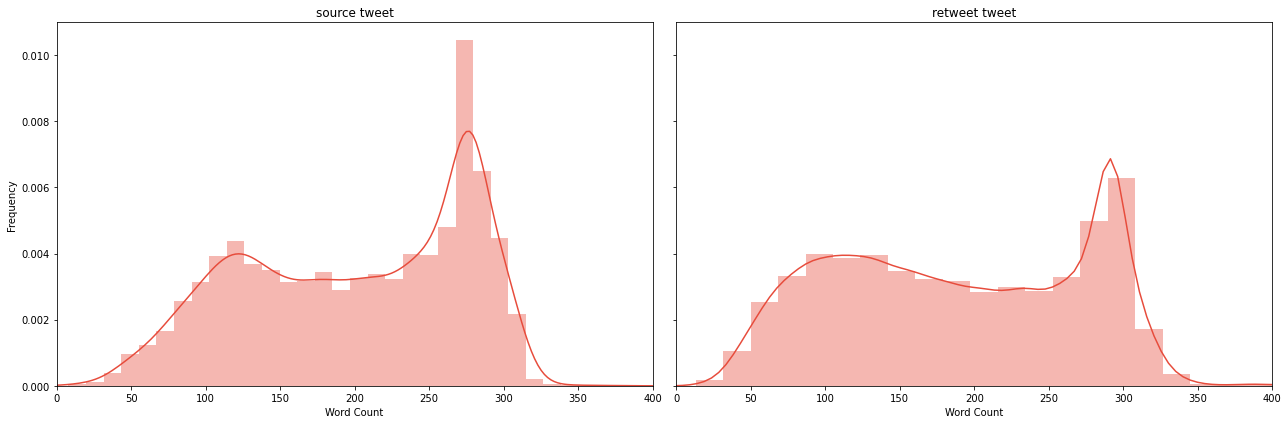

In [ ]:
# statistic the length of tweet, regarding to source/retweet and rumor/nonrumor
def plot_word_count(listA, listB, titleA, titleB):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(listA, ax=axes[0], color='#e74c3c')
    sns.distplot(listB, ax=axes[1], color='#e74c3c')
    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(titleA)
    axes[1].set_xlabel('Word Count')
    axes[1].set_title(titleB)
    axes[0].set_xlim(0, 400)
    axes[1].set_xlim(0, 400)
    
    fig.tight_layout()

def get_source_retweet_list(givenCovidData):
  sourceList, reTweetList = [], []
  for i, tweetChain in enumerate(givenCovidData):
    for j, tweet in enumerate(tweetChain):
      if j == 0:
        sourceList.append(len(tweet['text']))
      else:
        reTweetList.append(len(tweet['text']))
  return sourceList, reTweetList

rumorSourceList, rumorReTweetList = get_source_retweet_list(rumorList)
nonRumorSourceList, nonRumorReTweetList = get_source_retweet_list(nonRumorList)

plot_word_count(rumorSourceList, rumorReTweetList, 'source tweet', 'retweet tweet')
plot_word_count(nonRumorSourceList, nonRumorReTweetList, 'source tweet', 'retweet tweet')


### Add time line of soruce tweet/ retweet

## Do rumour source tweets convey a different sentiment/emotion to the non-rumour source tweets? What about their replies?

In [ ]:
! pip install textblob

In [ ]:
import re
from tqdm import tqdm
def clean_tweet(tweet):
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

from textblob import TextBlob
def get_tweet_sentiment(tweet):
  analysis = TextBlob(clean_tweet(tweet))
  if analysis.sentiment.polarity > 0:
    return 1, 'positive', analysis.sentiment.polarity
  elif analysis.sentiment.polarity == 0:
    return 0, 'neutral', analysis.sentiment.polarity
  else:
    return -1, 'negative', analysis.sentiment.polarity

def statistic_sentiment_distribtion(giventCovidData):
  sentimentDict = {'positive': 0, 'neutral': 0, 'negative': 0}

  for i in range(len(giventCovidData)):
    for j in range(len(giventCovidData[i])):
      sentiment = giventCovidData[i][j]['sentiment']
      sentimentDict[sentiment] += 1
  return sentimentDict

# attach sentiment analysis to covid data
for i in tqdm(range(len(covidData))):
  for j in range(len(covidData[i])):
    value, sentiment, trueValue = get_tweet_sentiment(covidData[i][j]['text'])
    covidData[i][j]['sentiment'] = sentiment
    covidData[i][j]['sentimentValue'] = value
    covidData[i][j]['sentimentMetric'] = trueValue

# extract the rumour and non rumour list
rumorList = []
nonRumorList = []
for i, tweetChain in enumerate(covidData):
  if tweetChain:
    if int(covidLabelOri[i]['label']) == 1:
      rumorList.append(tweetChain)
    else:
      nonRumorList.append(tweetChain)

rumourDict = statistic_sentiment_distribtion(rumorList)
nonRumourDict = statistic_sentiment_distribtion(nonRumorList)

100%|██████████| 17458/17458 [01:20<00:00, 216.07it/s]


In [ ]:
covidDataRe = []
for i, tweetChain in enumerate(covidData):
  if tweetChain != []:
    for j, tweet in enumerate(tweetChain):
      tweet['label'] = int(covidLabelOri[i]['label'])
      tweet['retweet_count'] = int(tweet['public_metrics']['retweet_count'])
      tweet['reply_count'] = int(tweet['public_metrics']['reply_count'])
      tweet['like_count'] = int(tweet['public_metrics']['like_count'])

      tweet['quote_count'] = int(tweet['public_metrics']['quote_count'])
      covidDataRe.append(tweet)
dfCovidDataRe = pd.DataFrame(covidDataRe)

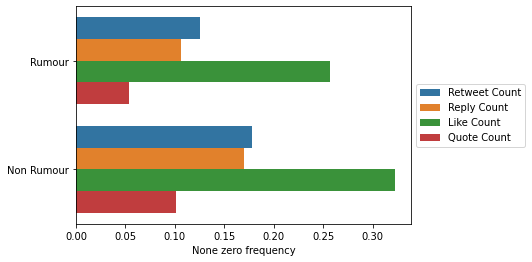

In [ ]:
# label proporation
def statisticHaveLabel(dfCovidDataRe, label):
  dfCovidDataReNonRumour = dfCovidDataRe[dfCovidDataRe['label'] == 0]
  dfCovidDataReRumour = dfCovidDataRe[dfCovidDataRe['label'] == 1]
  return [len(dfCovidDataReRumour[dfCovidDataReRumour[label] > 0]) / len(dfCovidDataReRumour), len(dfCovidDataReNonRumour[dfCovidDataReNonRumour[label] > 0]) / len(dfCovidDataReNonRumour)]
dfCovidDataRe = pd.DataFrame(covidDataRe)

plotDict = {}
plotDict['Retweet Count'] = statisticHaveLabel(dfCovidDataRe, 'retweet_count')
plotDict['Reply Count'] = statisticHaveLabel(dfCovidDataRe, 'reply_count')
plotDict['Like Count'] = statisticHaveLabel(dfCovidDataRe, 'like_count')
plotDict['Quote Count'] = statisticHaveLabel(dfCovidDataRe, 'quote_count')
plotDict['Classifier'] = ['Rumour', 'Non Rumour']
dfPlotDF = pd.DataFrame(plotDict)
dfPlotDF = dfPlotDF.melt(id_vars="Classifier", var_name="media volumn")

ax = sns.barplot(x="value", y="Classifier", hue="media volumn", data=dfPlotDF)
ax.set(ylabel="", xlabel="None zero frequency")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
# sorted by source sentiment
# rumorListSorted = sorted(rumorList, key = lambda i: i[0]['sentimentMetric'],reverse=False)
# for i in range(20):
#   if len(rumorListSorted[i][0]['text']) > 50:
#     print("text: ", rumorListSorted[i][0]['text'], "\nsentiment value: ", rumorListSorted[i][0]['sentimentMetric'])
#     print("\n")

nonRumorListSorted = sorted(nonRumorList, key = lambda i: i[0]['sentimentMetric'],reverse=False)
# statistic the sentiment sum up

for i in range(100):
  if len(nonRumorListSorted[i][0]['text']) > 250 :
    print("text: ", nonRumorListSorted[i][0]['text'], "\nsentiment value: ", nonRumorListSorted[i][0]['sentimentMetric'])
    print("\n")

text:  Matt Hancock is trying to claim Lockdown started on March 16th even though it was not imposed until March 23rd. The Tories are attempting to re-write history on their shocking response to #coronavirus and cover up their failures. Matt must correct this Now and stop this nonsense! 
sentiment value:  -1.0


text:  Cardiologist Dr. Jonathan Reiner says President Trump’s suggestion that an “injection” of “disinfectant” could treat coronavirus is a "terrible distraction," adding that "it's distracting us from the fact that this virus is killing thousands of Americans." https://t.co/IYyLSf3Zir https://t.co/GBW8lzUYXM 
sentiment value:  -1.0


text:  The horrific death of George Floyd in Minneapolis was reprehensible. It was beyond a tragedy; it was a crime. Today, I spoke on the Senate floor about the need to join together to ensure that the legacy of George Floyd is of progress, not deepening division and hatred. https://t.co/JQrkzpJeLv 
sentiment value:  -1.0


text:  Grim news from

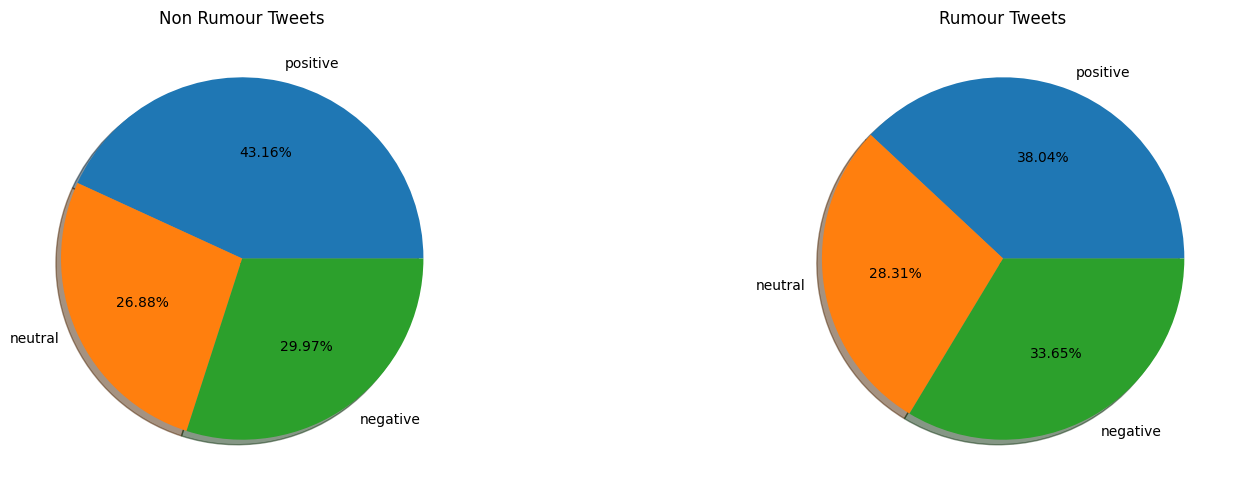

In [ ]:
def plot_sentiment_distribution(rumourDict, nonRumourDict):
  fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), dpi=100)
  axes[0].set_title('Non Rumour Tweets')
  axes[0].pie(list(nonRumourDict.values()),
              labels=list(nonRumourDict.keys()),
              autopct='%1.2f%%',
              shadow=True)

  axes[1].set_title('Rumour Tweets')
  axes[1].pie(list(rumourDict.values()),
              labels=list(rumourDict.keys()),
              autopct='%1.2f%%',
              shadow=True)
  fig.suptitle('', fontsize=24)
  plt.show()
plot_sentiment_distribution(rumourDict, nonRumourDict)

## What are the popular hashtags of COVID-19 rumours and non-rumours? How much overlap or difference do they share?

In [ ]:
# demo
# print(dfCovidData[0][17448]['context_annotations'][0]['domain']['name'])
# print(dfCovidData[0][17448]['context_annotations'][0]['entity']['name'])

# plot topic, base on context annotations
from collections import Counter
def getDict(listGet):
  return dict(Counter(listGet).most_common())

def getTopicInDF(givenCovidData):

  topicEntity = []
  topicDomain = []

  for i, tweetChain in enumerate(givenCovidData):
    for tweet in tweetChain:
      if 'context_annotations' in list(tweet.keys()):
        for context_annotation in tweet['context_annotations']:
          domain = context_annotation['domain']['name']
          entity = context_annotation['entity']['name']
          topicEntity.append(domain)
          topicDomain.append(entity)
  topicEntityDf = pd.DataFrame.from_dict(getDict(topicEntity), orient='index').reset_index()
  topicDomainDf = pd.DataFrame.from_dict(getDict(topicDomain), orient='index').reset_index()
  return topicEntityDf, topicDomainDf
def createRumorProportion(row):
  return row['0_x']/ ( row['0_y'] + row['0_x'])
  
def plotTopicDistribution(rumourTopicEntityDf, nonRumourTopicEntityDf):
  fig, axes = plt.subplots(2, 1, figsize=(18, 8))
  axes = axes.flatten()

  sns.barplot(x=rumourTopicEntityDf[0][0:15], y=rumourTopicEntityDf['index'][0:15], palette='Blues_d',ax = axes[1])
  sns.barplot(x=nonRumourTopicEntityDf[0][0:15], y=nonRumourTopicEntityDf['index'][0:15], palette='Blues_d', ax = axes[0])
  axes[0].set_title('Non Rumour Tweets')
  axes[1].set_title('Rumour Tweets')

  axes[0].set_ylabel("")
  axes[1].set_ylabel("")
  axes[1].set_xlabel('Count Numeber')
  axes[0].set_xlabel('')

def plotTopicDistributionOne(topicDf):
  df1 = topicDf.groupby('index', sort=False).sum().reset_index()

  fig, ax1 = plt.subplots(figsize=(12,6))
  ax2 = ax1.twinx()
  sns.lineplot(data=topicDf,x='index',y='rumour proportion',marker='o', sort = False, legend='auto', color='green',ax=ax2)
  
  sns.set()
  df1.set_index('index').plot(kind='bar', stacked=True, grid=False, legend=False, ax=ax1)
  handles, labels = ax1.get_legend_handles_labels()
  handles1, labels1 = ax2.get_legend_handles_labels()
  ax2.legend(handles+handles1, labels+labels1, loc='upper left', bbox_to_anchor=(1.05, 1), frameon=False)
  plt.show()


concenrn with entity


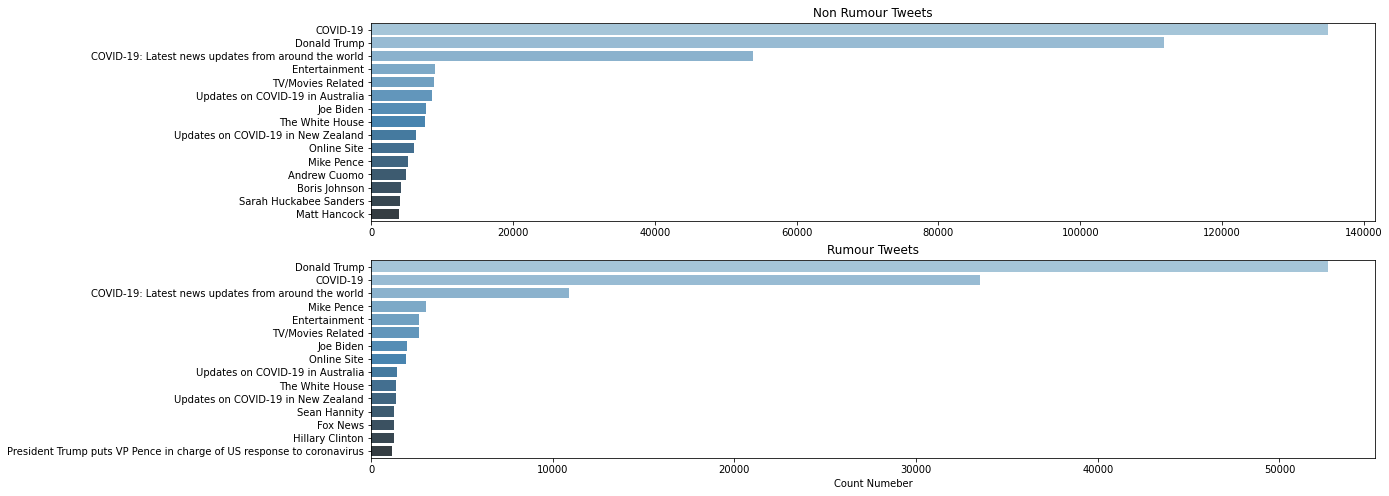

In [ ]:
rumourCovidData = [ tweetChain for i, tweetChain in enumerate(covidData) if int(covidLabelOri[i]['label']) == 1]
nonRumourCovidData = [ tweetChain for i, tweetChain in enumerate(covidData) if int(covidLabelOri[i]['label']) == 0]

rumourTopicEntityDf, rumourTopicDomainDf = getTopicInDF(rumourCovidData)
nonRumourTopicEntityDf, nonRumourTopicDomainDf = getTopicInDF(nonRumourCovidData)
print("concenrn with entity")
plotTopicDistribution(rumourTopicDomainDf, nonRumourTopicDomainDf)

In [ ]:
df_merge = pd.merge(rumourTopicDomainDf, nonRumourTopicDomainDf, on='index')
df_merge['rumour proportion'] = df_merge.apply(lambda row: createRumorProportion(row), axis=1)
df_merge.rename(columns = {'0_x':'rumour', '0_y':'not rumour'}, inplace = True)
# plotTopicDistributionOne(df_merge[0:15])
listName = []
for i, r in enumerate(rumourCovidData):
  for rC in r:
    if 'context_annotations' in rC:
      sourceTweetContext = rC['context_annotations']
      for context in sourceTweetContext:
        # listName.append(context['entity']['name'])
        if context['entity']['name'] == 'Mike Pence':
          listName.append(rC)
# print(set(listName))

In [ ]:
listName[31]['text']

'@realDonaldTrump You make everything about you.  You are now afraid the handling of Coronavirus will hurt you in the election.  So you passed it to Pence.  He will be your scapegoat.  And projected it on the Dems.  Obama was not impeached'

## What are the topics of COVID-19 rumours, and how do they differ from the non-rumours?

## How do COVID-19 rumour topics or trends evolve over time\

### created at hour
https://www.justintodata.com/twitter-sentiment-analysis-python/
### tweet attribute compare
https://github.com/Bachfischer/COMP90042-Rumour-Detection-on-Twitter/blob/master/src/02_rumour_analysis.ipynb
### grab user timeline

In [ ]:
# add weight to each tweet
import math
def tweetPublicMetric(tweetObject):
  value = 0
  public_metircs = tweetObject['public_metrics']
  value = public_metircs['like_count'] +  public_metircs['retweet_count'] * 1.5 + public_metircs['quote_count'] * 2 + public_metircs['reply_count'] * 2.5
  return value

max_metric_value = 0
max_time_line = 0
max_time_line_index = 0
for i in tqdm(range(len(covidData))):
  if len(covidData[i]) > max_time_line:
    max_time_line = len(covidData[i])
    max_time_line_index = i
  for j in range(len(covidData[i])):
    covidData[i][j]['metricWeight'] = tweetPublicMetric(covidData[i][j])
    max_metric_value = max(max_metric_value, covidData[i][j]['metricWeight'])

# # normalized the metric_value
# for i in tqdm(range(len(covidData))):
#   for j in range(len(covidData[i])):
#     covidData[i][j]['metricWeight'] = math.log10(covidData[i][j]['metricWeight'] + 10)
# # choose example to show the typical timeline

100%|██████████| 17458/17458 [00:00<00:00, 19822.23it/s]


Text(0.5, 0, 'Count')

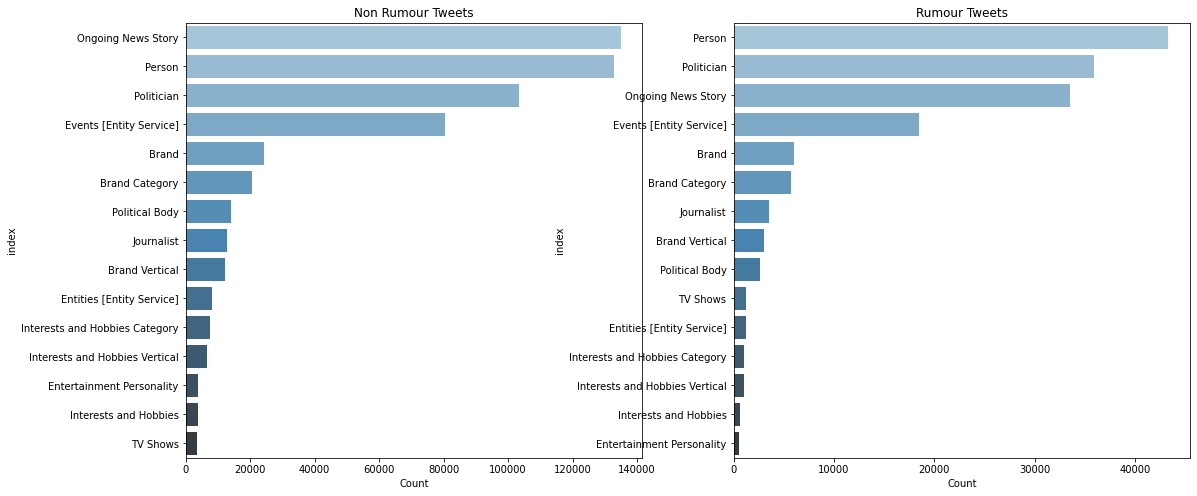

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

sns.barplot(x=rumourTopicEntityDf[0][0:15], y=rumourTopicEntityDf['index'][0:15], palette='Blues_d',ax = axes[1])
sns.barplot(x=nonRumourTopicEntityDf[0][0:15], y=nonRumourTopicEntityDf['index'][0:15], palette='Blues_d', ax = axes[0])
axes[0].set_title('Non Rumour Tweets')
axes[1].set_title('Rumour Tweets')

axes[0].set_xlabel('Count')
axes[1].set_xlabel('Count')

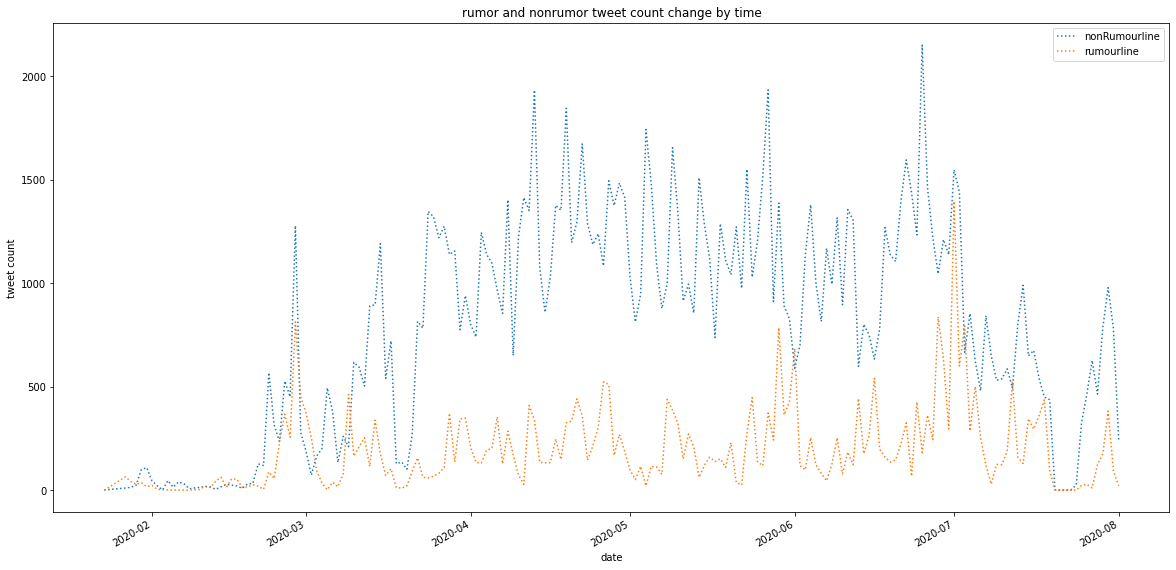

In [ ]:
# rebuild the topic distribution base on public metric/count
from datetime import datetime
def converDateTime(dateStr):
  return datetime.strptime(dateStr, '%m/%d/%Y')

rumorDateTimeList = []
nonRumorDateTimeList = []

idmin = covidData[1][0]['id']
idmax = covidData[1][0]['id']

for i, tweetChain in enumerate(covidData):
  for index, tweet in enumerate(tweetChain):
    idmin = min(tweet['id'], idmin)
    idmax = max(tweet['id'], idmax)
    if int(covidLabelOri[i]['label']) == 1:
      rumorDateTimeList.append(converDateTime(tweet['created_at']))
    else:
      nonRumorDateTimeList.append(converDateTime(tweet['created_at']))

rumorDateTimeDict = dict(Counter(rumorDateTimeList))
nonRumorDateTimeDict = dict(Counter(nonRumorDateTimeList))

mergeDict = {}
# merge two dict as tuple
for key in list(nonRumorDateTimeDict.keys()):
  # conver to tuple
  if key in list(rumorDateTimeDict.keys()):
    mergeDict[key] = (nonRumorDateTimeDict[key], rumorDateTimeDict[key])
  else:
    mergeDict[key] = (nonRumorDateTimeDict[key], 0)
# conver to df
df = pd.DataFrame.from_dict(mergeDict, orient='index', columns=['nonRumourline', 'rumourline'])

ax = df.plot(y=['nonRumourline', 'rumourline'], linestyle='dotted', ylabel='tweet count', xlabel='date', title='rumor and nonrumor tweet count change by time', figsize=(20, 10))

In [ ]:
idmin, idmax

(1220316724379013120, 1289636091062960129)

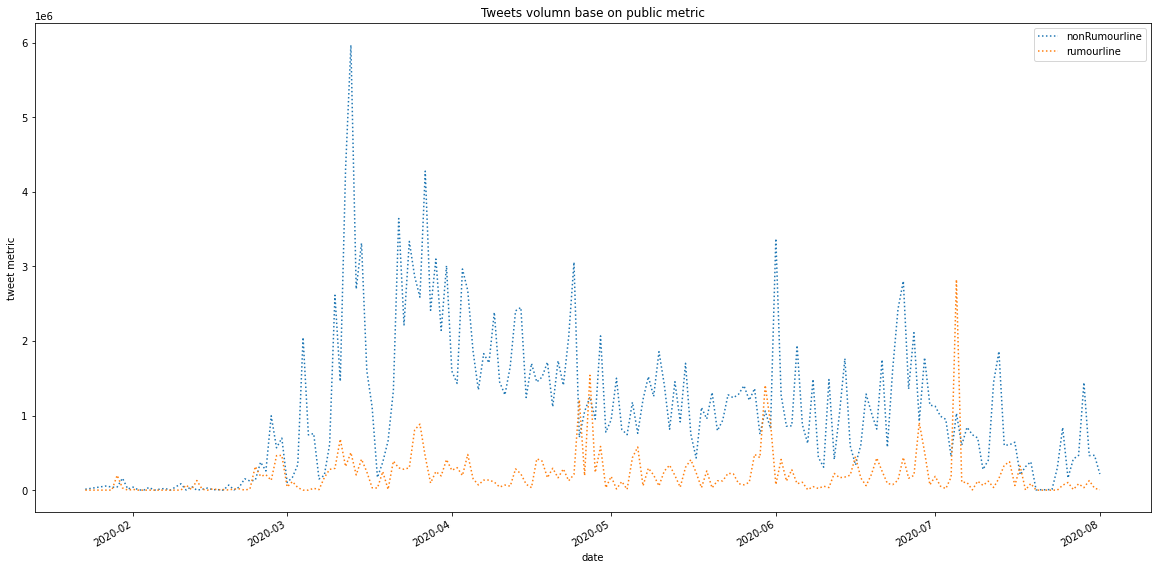

In [ ]:
# rebuild the topic distribution base on public metric/count
from datetime import datetime
def convertDateTime(dateStr):
  return datetime.strptime(dateStr, '%m/%d/%Y')

def updateDict(dictGet, key, value):
  if key not in list(dictGet.keys()):
    dictGet[key] = value
  else:
    dictGet[key] += value
  return dictGet

rumorDateTimeDict = {}
nonRumorDateTimeDict = {}
for i, tweetChain in enumerate(covidData):
  for index, tweet in enumerate(tweetChain):
    try:
      if int(covidLabelOri[i]['label']) == 1:
        rumorDateTimeDict = updateDict(rumorDateTimeDict, convertDateTime(tweet['created_at']), tweet['metricWeight'])
      else:
        nonRumorDateTimeDict = updateDict(nonRumorDateTimeDict, convertDateTime(tweet['created_at']), tweet['metricWeight'])
    except:
      print(tweet['created_at'])


mergeDict = {}
# merge two dict as tuple
for key in list(nonRumorDateTimeDict.keys()):
  # conver to tuple
  if key in list(rumorDateTimeDict.keys()):
    mergeDict[key] = (nonRumorDateTimeDict[key], rumorDateTimeDict[key])
  else:
    mergeDict[key] = (nonRumorDateTimeDict[key], 0)
# conver to df
df = pd.DataFrame.from_dict(mergeDict, orient='index', columns=['nonRumourline', 'rumourline'])

ax = df.plot(y=['nonRumourline', 'rumourline'], linestyle='dotted', ylabel='tweet metric', xlabel='date', title='Tweets volumn base on public metric', figsize=(20, 10))

## extract the date when the rumuour exceed the nonrumor weights.



concenrn with entity
concenrn with domain


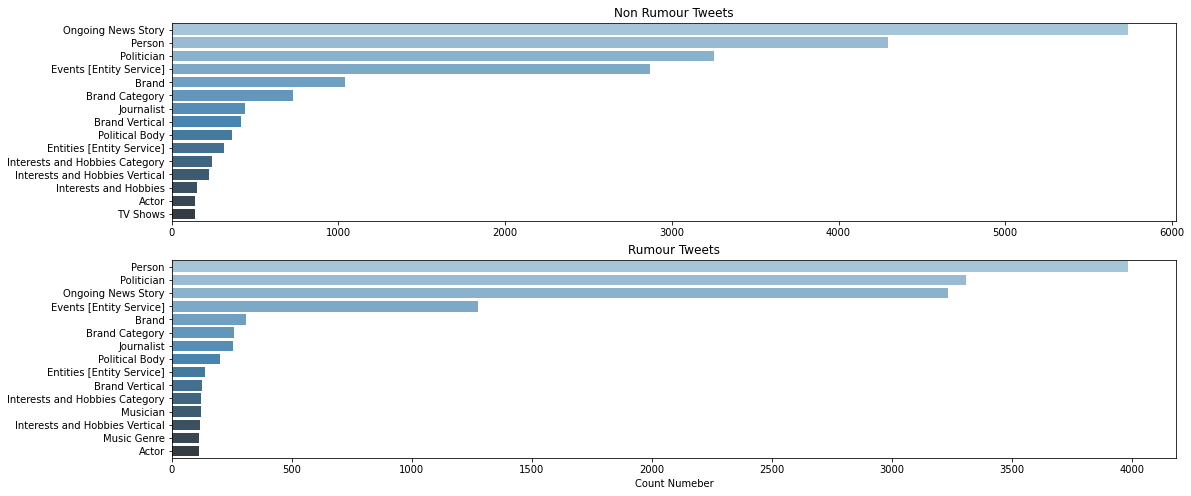

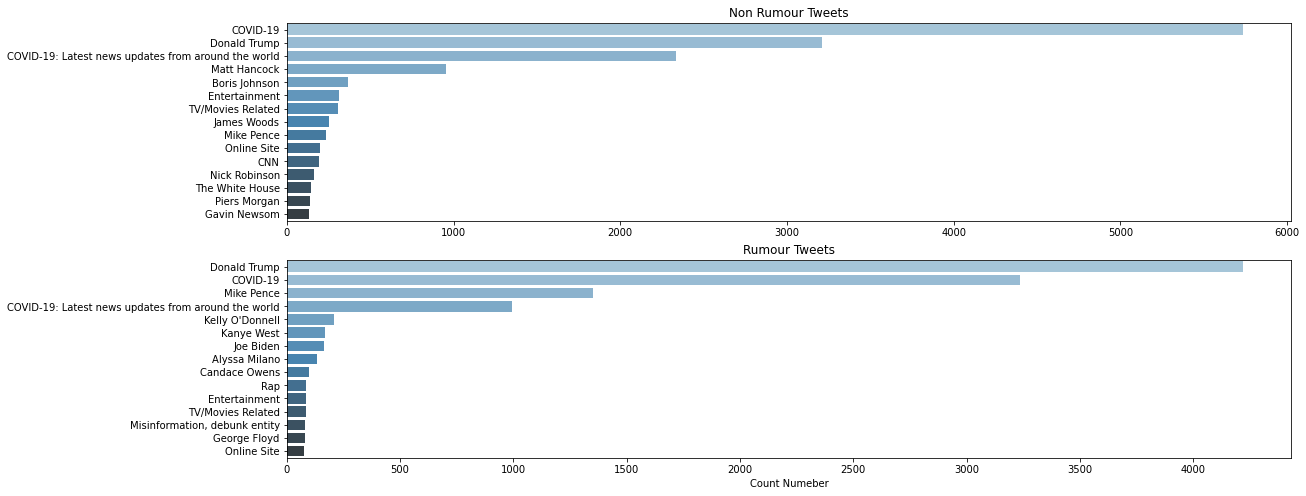

In [ ]:
# Get the marable date
dateList = []
for date, (nM, rM) in mergeDict.items():
  if rM >= nM:
    dateList.append(date)

# Extract the markable tweet chain, regarding to rumor and nonrumor
markRumorList = []
markNonRumorList = []
for i, tweetChain in enumerate(covidData):
  if tweetChain:
    if convertDateTime(tweetChain[0]['created_at']) in dateList:
      if int(covidLabelOri[i]['label']) == 1:
        markRumorList.append(tweetChain)
      else:
        markNonRumorList.append(tweetChain)

# analysis the user concern topic toward to the covid
rumourTopicEntityDf, rumourTopicDomainDf = getTopicInDF(markRumorList)
nonRumourTopicEntityDf, nonRumourTopicDomainDf = getTopicInDF(markNonRumorList)

analysisOfRumor = {
    'domain_name_r':[],
    'domain_count_r': [],
    'domain_name':[],
    'domain_name_n':[],
    'domain_count_n': [],
    'rumor_proporation': [],
    'count': [],
}

# stupid written method
for i in range(len(rumourTopicDomainDf)):
  domainName = rumourTopicDomainDf.loc[i, "index"]
  domainRumorCount = rumourTopicDomainDf.loc[i, 0]
  analysisOfRumor['domain_name_r'].append(domainName)
  analysisOfRumor['domain_count_r'].append(domainRumorCount)

for i in range(len(nonRumourTopicDomainDf)):
  domainName = nonRumourTopicDomainDf.loc[i, "index"]
  domainRumorCount = nonRumourTopicDomainDf.loc[i, 0]
  analysisOfRumor['domain_name_n'].append(domainName)
  analysisOfRumor['domain_count_n'].append(domainRumorCount)

for i in range(len(analysisOfRumor['domain_name_n'])):
  domain = analysisOfRumor['domain_name_n'][i]
  if domain in analysisOfRumor['domain_name_r']:
    index = analysisOfRumor['domain_name_r'].index(domain)
    analysisOfRumor['count'].append(analysisOfRumor['domain_count_r'][index] + analysisOfRumor['domain_count_n'][i])
    analysisOfRumor['domain_name'].append(domain)
    analysisOfRumor['rumor_proporation'].append( analysisOfRumor['domain_count_r'][index] / (analysisOfRumor['domain_count_r'][index] + analysisOfRumor['domain_count_n'][i]))
del analysisOfRumor['domain_name_r']
del analysisOfRumor['domain_count_r']
del analysisOfRumor['domain_count_n']
del analysisOfRumor['domain_name_n']
# analysis the user mood toward to the covid
print("concenrn with entity")
plotTopicDistribution(rumourTopicEntityDf, nonRumourTopicEntityDf)
print("concenrn with domain")
plotTopicDistribution(rumourTopicDomainDf, nonRumourTopicDomainDf)

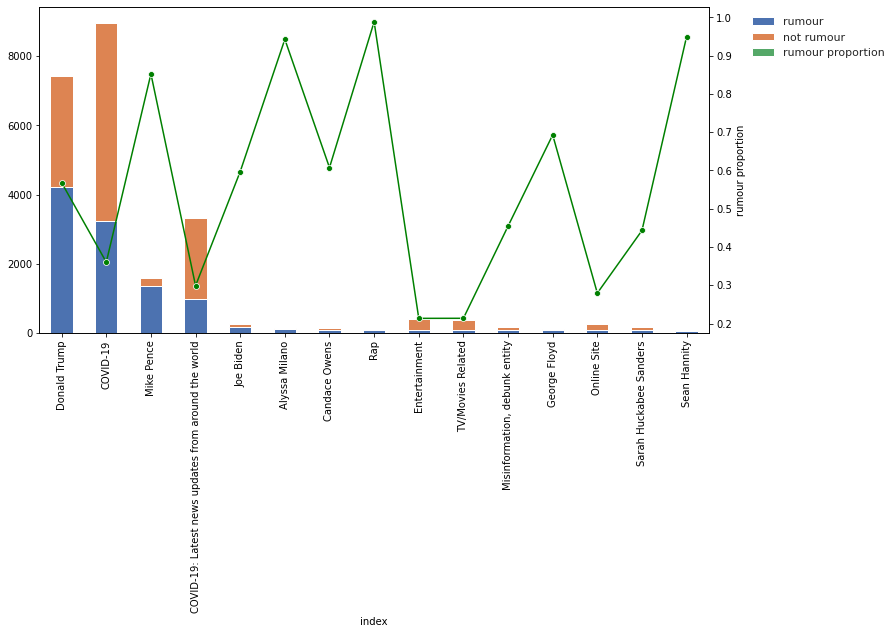

In [ ]:
df_merge = pd.merge(rumourTopicDomainDf, nonRumourTopicDomainDf, on='index')
df_merge['rumour proportion'] = df_merge.apply(lambda row: createRumorProportion(row), axis=1)
df_merge.rename(columns = {'0_x':'rumour', '0_y':'not rumour'}, inplace = True)
plotTopicDistributionOne(df_merge[0:15])

In [ ]:
a = pd.DataFrame(analysisOfRumor)
b = a.sort_values(by=['count'])[-20:]
b.sort_values(by=['rumor_proporation'])

,domain_name,rumor_proporation,count
3,Boris Johnson,0.005405,370
11,Piers Morgan,0.014085,142
6,James Woods,0.093525,278
9,CNN,0.151515,231
12,Ivanka Trump,0.164384,146
4,Entertainment,0.213568,398
5,TV/Movies Related,0.213740,393
10,The White House,0.260000,200
8,Online Site,0.279570,279
2,COVID-19: Latest news updates from around the ...,0.298920,3332


## extract the user count for rumor and nonruor

In [ ]:
userDict = {}
count = 0
for i in tqdm(range(len(covidData))):
  tweetChain = covidData[i]
  for tweet in tweetChain:
    userID = tweet['author_id']
    # attach user to user List if not exist
    if userID not in userDict:
      userDict[userID] = {'tweetID': [], 'rumorTextList': [], 'nonRumorTextList': [], 'domain': {}, 'entity': {}, 'sentimentList': [], 'totalTwitterLength': 0, 'rumorTwitterLength': 0, 'nonRumorTwitterLength': 0}
    # update value
    try:
      for context_annotation in tweet['context_annotations']:
        domainName = context_annotation['domain']['name']
        entityName = context_annotation['entity']['name']
        if domainName not in userDict[userID]['domain']:
          userDict[userID]['domain'][domainName] = 1
        else:
          userDict[userID]['domain'][domainName] += 1
        
        if entityName not in userDict[userID]['entity']:
          userDict[userID]['entity'][entityName] = 1
        else:
          userDict[userID]['entity'][entityName] += 1
    except:
      count += 1
    # update rumor/nonrumor of text
    if int(covidLabelOri[i]['label']) == 1:
      # userDict[userID]['rumorTextList'].append(tweet['text'])
      userDict[userID]['rumorTwitterLength'] += 1
    else:
      # userDict[userID]['nonRumorTextList'].append(tweet['text'])
      userDict[userID]['nonRumorTwitterLength'] += 1
    # update twitter text length user has sent
    userDict[userID]['totalTwitterLength'] += 1
    userDict[userID]['tweetID'].append(tweet['id'])
    # update sentiment list
    userDict[userID]['sentimentList'].append(tweet['sentiment'])

100%|██████████| 17458/17458 [00:03<00:00, 5362.60it/s]


In [ ]:
# sort user dict by tweet
userDict = dict(sorted(userDict.items(), key=lambda item: item[1]['rumorTwitterLength'], reverse = True))
# rumorDistribution = Counter()
# for (key, value) in list(userDict.items())[:100]:
#   rumorDistribution += Counter(value['sentimentList'])

# userDict = dict(sorted(userDict.items(), key=lambda item: item[1]['nonRumorTwitterLength'], reverse=True))
# nonRumorDistribution = Counter()
# for (key, value) in list(userDict.items())[:100]:
#   nonRumorDistribution += Counter(value['sentimentList'])

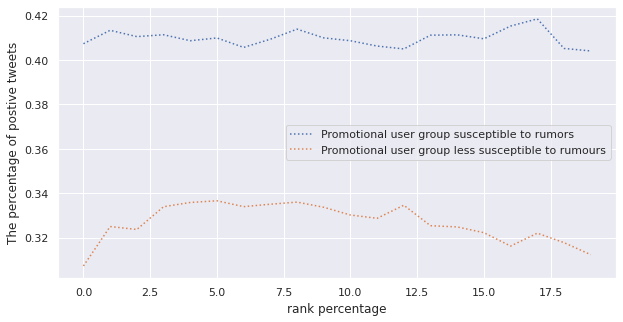

In [ ]:

userDict = dict(sorted(userDict.items(), key=lambda item: item[1]['rumorTwitterLength'], reverse = True))

positiveList = []
neutralList = []
negativeList = []
listUser = list(userDict.values())[:10000]
for i in range(20):
  a, b, c = 0, 0, 0
  for j in range(500):
    index = i*50 + j
    countDict = dict(Counter(listUser[index]['sentimentList']))
    if 'positive' in countDict:
      a += countDict['positive']
    if 'neutral' in countDict:
      b += countDict['neutral']
    if 'negative' in countDict:
      c += countDict['negative']
  positiveList.append(a)
  neutralList.append(b)
  negativeList.append(c)

# normalize the result
for i in range(len(positiveList)):
  sumS = positiveList[i] + neutralList[i] + negativeList[i]
  positiveList[i] /= sumS
  neutralList[i] /= sumS
  negativeList[i] /= sumS
line1 = [ positiveList[i] for i in range(len(positiveList))]


userDict = dict(sorted(userDict.items(), key=lambda item: item[1]['nonRumorTwitterLength'], reverse = True))
positiveList = []
neutralList = []
negativeList = []

listUser = list(userDict.values())[:10000]
for i in range(20):
  a, b, c = 0, 0, 0
  for j in range(500):
    index = i*50 + j
    countDict = dict(Counter(listUser[index]['sentimentList']))
    if 'positive' in countDict:
      a += countDict['positive']
    if 'neutral' in countDict:
      b += countDict['neutral']
    if 'negative' in countDict:
      c += countDict['negative']
  positiveList.append(a)
  neutralList.append(b)
  negativeList.append(c)

# normalize the result
for i in range(len(positiveList)):
  sumS = positiveList[i] + neutralList[i] + negativeList[i]
  positiveList[i] /= sumS
  neutralList[i] /= sumS
  negativeList[i] /= sumS

line2 = [ positiveList[i] for i in range(len(positiveList))]

dictLineList = []
for i in range(len(line2)):
  dictLine = {}
  dictLine['Promotional user group susceptible to rumors'] = line1[i]
  dictLine['Promotional user group less susceptible to rumours'] = line2[i]
  dictLine['name'] = i*50
  dictLineList.append(dictLine)

dictLineDf = pd.DataFrame(dictLineList)
# print(dictLineDf)
# df.plot(kind='line',x=dictLineDf['name'],y=dictLineDf['twitterGroupHardToSufferRumor'], color='blue')
# df.plot(kind='line',x=dictLineDf['name'],y=dictLineDf['twitterGroupEasyToSufferRumor'], color='red')

# plt.show()

ax = dictLineDf.plot(y=['Promotional user group susceptible to rumors', 'Promotional user group less susceptible to rumours'], linestyle='dotted', ylabel='The percentage of postive tweets', xlabel='rank percentage', title='', figsize=(10, 5))

In [ ]:
for i in range(len(covidData)):
  if covidData[i] != []:
    for j in range(len(covidData[i])):
      covidData[i][j]['label'] = int(covidLabelOri[i]['label'])
# sorted by tweet length
covidDataSorted = sorted(covidData, key = lambda i: len(i),reverse=True)

# define sample number
def getTweetVolumnList(tweetChain, sampleNumber = 45):
  # exclude the source tweet
  tweetChain = tweetChain[1:]
  sentimentTimeLine = []
  slotNumber = int(len(tweetChain) / sampleNumber)
  for i in range(sampleNumber):
    sumUp = 0
    dictLine = {}
    for j in range(slotNumber):
      index = slotNumber*i + j
      sentimentValue = 0
      if tweetChain[index]['sentiment'] == 'positive':
        sentimentValue = 1
      elif tweetChain[index]['sentiment'] == 'negative':
        sentimentValue = -1
      metricValue = sentimentValue
      metric = tweetChain[index]['public_metrics']
      # social scale up the sentiment expression

      if metric['like_count']*0.1+metric['retweet_count']*0.15+metric['quote_count']*0.2+metric['reply_count']*0.25 != 0:
        metricValue += metricValue * (metric['like_count']*0.1+metric['retweet_count']*0.15+metric['quote_count']*0.2+metric['reply_count']*0.25)
      
      sumUp += metricValue
    dictLine['tweet media volumn of sentiment'] = sumUp
    dictLine['slot index'] = i
    sentimentTimeLine.append(dictLine)
  return sentimentTimeLine

# plot multiple line in one figure
def dictForPlotTimeLine(givenList, sampleNumber=45):
  sentimentTimeLine = []
  for sampleIndex in range(sampleNumber):
    dictLine = {}
    dictLine["tweet media volumn of sentiment"] = 0
    for i, listI in enumerate(givenList):
      dictLine["tweet media volumn of sentiment"] += listI[sampleIndex]['tweet media volumn of sentiment']
    dictLine['slot index'] = sampleIndex
    sentimentTimeLine.append(dictLine)
  return sentimentTimeLine

# merge rumour and non-rumour dict
def mergePlotDict(rumourListExample, nonRumourListExample):
  resultList = []
  # suppose same length of two examples
  for i in range(len(rumourListExample)):
    dictLine = {"tweet media volumn of sentiment for rumour": rumourListExample[i]["tweet media volumn of sentiment"],
           "tweet media volumn of sentiment for non-rumour": nonRumourListExample[i]["tweet media volumn of sentiment"],
           "slot index": rumourListExample[i]['slot index']}
    resultList.append(dictLine)
  return(resultList)
# user 300 longest tweet chain as example
covidDataSorted300 = covidDataSorted[:300]
# sort the tweet by publish time
for i in range(len(covidDataSorted300)):
  covidDataSorted300[i] = sorted(covidDataSorted300[i], key = lambda tweet: tweet['id'],reverse=False)

# get rumour and non rumour example
# until there are 50 rumour and non-rumour tweet chain for each
rumourListExample = []
nonRumourListExample = []
for i in range(len(covidDataSorted300)):
  tweetChain = covidDataSorted300[i]
  if tweetChain[0]['label'] == 0 and len(nonRumourListExample) <= 49:
    nonRumourListExample.append(getTweetVolumnList(tweetChain))
  elif len(rumourListExample) <= 49:
    rumourListExample.append(getTweetVolumnList(tweetChain))
# get the plot figure
dictPlotForRumour = dictForPlotTimeLine(rumourListExample)
dictPlotForNonRumour = dictForPlotTimeLine(nonRumourListExample)

In [ ]:
mergeDict = mergePlotDict(dictPlotForRumour, dictPlotForNonRumour)

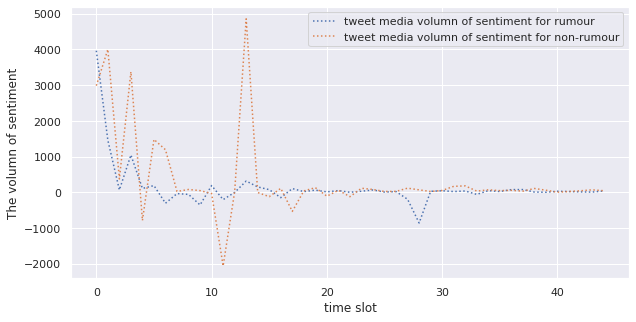

In [ ]:
dictMetricTimeLineDf = pd.DataFrame(mergeDict)
ax = dictMetricTimeLineDf.plot(y=["tweet media volumn of sentiment for rumour", "tweet media volumn of sentiment for non-rumour"],linestyle='dotted', ylabel='The volumn of sentiment', xlabel='time slot', title='', figsize=(10, 5))